In [ ]:
import os
import pandas as pd
import random
import shutil

data_path = r'C:\Users\chloe\OneDrive\Desktop\swallow EMG\data\participants\1\extracted signals'
class_folders = os.listdir(data_path)

In [2]:
os.chdir("..") 
from src import feature_extraction, models, utils, results

exclude = ['oral prep 0', 'grape 5', 'popcorn 1', 'carrot 5', 'chewing 0']
df, class_map = feature_extraction.make_df(data_path, exclude, rectify=True)

df

substance volume         1                                               \
                           min       max        mav        rms   wavelength   
0           0     10  0.008171   89.8215  10.123081  15.526914  6523.009610   
1           0     10  0.014390  113.9200   9.896790  16.791919  6233.789738   
2           0     10  0.007434   84.7438  10.532140  16.572327  6760.427350   
3           0     10  0.006541  194.0030  11.846242  20.842131  7500.060554   
4           0     10  0.035046  117.7260  11.854229  18.994828  7345.914933   
..        ...    ...       ...       ...        ...        ...          ...   
318         6     20  0.003147   69.5755  10.175371  15.426147  6745.086799   
319         6     20  0.005568   86.3076  11.288252  18.020237  7577.281701   
320         6     20  0.000494   93.5527  11.081596  17.163182  6635.526360   
321         6     20  0.013517   95.3684  11.031382  16.758005  7608.132043   
322         6     20  0.008510   95.7571  13.782139  20.737838  8793.136425   

                                                  ...       21  22         \
            var abs_diffs_signal shannon_entropy  ...     iemg min    max   
0    138.608278      6523.009610        3.144998  ...  3186400   0  15680   
1    184.022091      6233.789738        2.722021  ...  4700640   0  12740   
2    163.716051      6760.427350        3.258898  ...  4222820   0  14560   
3    294.060998      7500.060554        2.208135  ...  4793600   0  22260   
4    220.280747      7345.914933        2.957998  ...  6150060   0  15400   
..          ...              ...             ...  ...      ...  ..    ...   
318  134.427841      6745.086799        3.512629  ...  3647980   0  18760   
319  197.304315      7577.281701        3.340312  ...  4262440   0  23240   
320  171.773035      6635.526360        3.213884  ...  4577440   0  13580   
321  159.139349      7608.132043        3.211234  ...  3906560   0  15960   
322  240.110577      8793.136425        3.508520  ...  4748940   0  14280   

                                                                     \
         mav          rms wavelength           var abs_diffs_signal   
0    3322.06  4634.416598     404180  1.044173e+07           404180   
1    4038.86  4996.715521     428540  8.654776e+06           428540   
2    4577.86  5597.687773     380100  1.037731e+07           380100   
3    5437.88  6691.171078     448700  1.520123e+07           448700   
4    5531.54  6675.993619     348460  1.397096e+07           348460   
..       ...          ...        ...           ...              ...   
318  3136.98  4313.488379     319480  8.765538e+06           319480   
319  3865.40  5367.578821     388500  1.386959e+07           388500   
320  4293.94  5302.465577     381500  9.678220e+06           381500   
321  3813.46  5118.934928     377720  1.166102e+07           377720   
322  3783.08  4801.379552     447160  8.741551e+06           447160   

                              
    shannon_entropy     iemg  
0          4.050777  3322060  
1          4.555497  4038860  
2          4.463484  4577860  
3          4.149748  5437880  
4          4.642691  5531540  
..              ...      ...  
318        3.728831  3136980  
319        3.674167  3865400  
320        4.528562  4293940  
321        4.221139  3813460  
322        4.333475  3783080  

[323 rows x 200 columns]

# Single Label Classification
### Substance Classification

----------------------------
Accuracy: 0.8769
Precision: 0.8874
Recall: 0.8769
F1 score: 0.8733


C:\Users\chloe\AppData\Local\Temp\ipykernel_35596\1622658804.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  x = df.drop(columns=['volume', 'substance'])


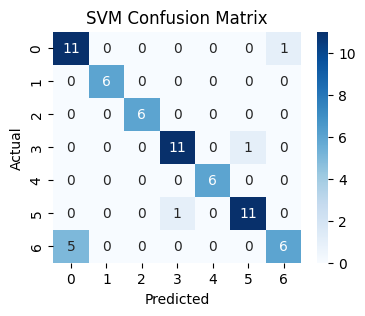

----------------------------
Accuracy: 0.9231
Precision: 0.9262
Recall: 0.9231
F1 score: 0.9233


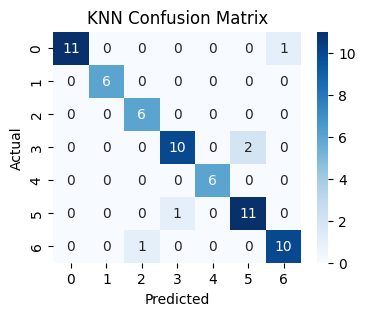

----------------------------
Accuracy: 0.8462
Precision: 0.8724
Recall: 0.8462
F1 score: 0.8455


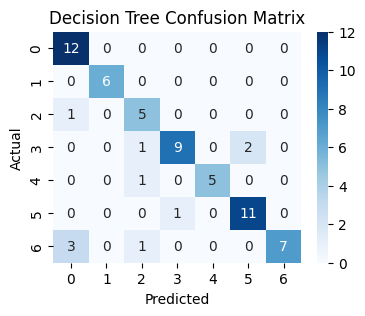

----------------------------
Accuracy: 0.8462
Precision: 0.8497
Recall: 0.8462
F1 score: 0.8423


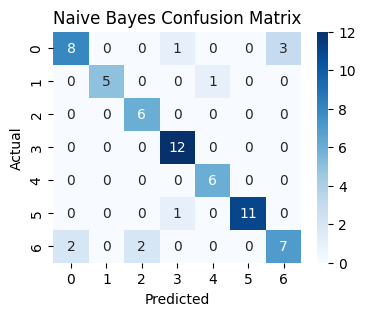

----------------------------
Accuracy: 0.8923
Precision: 0.9039
Recall: 0.8923
F1 score: 0.8886


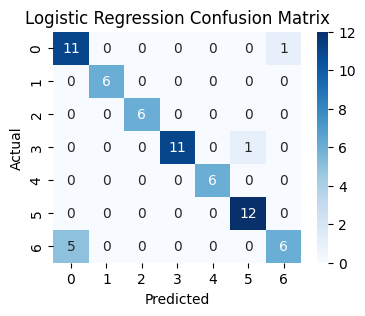

----------------------------
Accuracy: 0.8769
Precision: 0.8778
Recall: 0.8769
F1 score: 0.8721


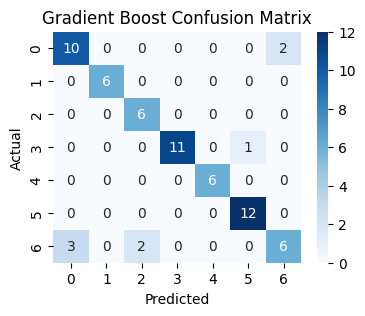

In [3]:
x = df.drop(columns=['volume', 'substance'])
y = df['substance']

sub_accuracies, sub_precisions, sub_recalls, sub_f1_scores = models.train_single_models(x, y, 42)

### Model Comparison

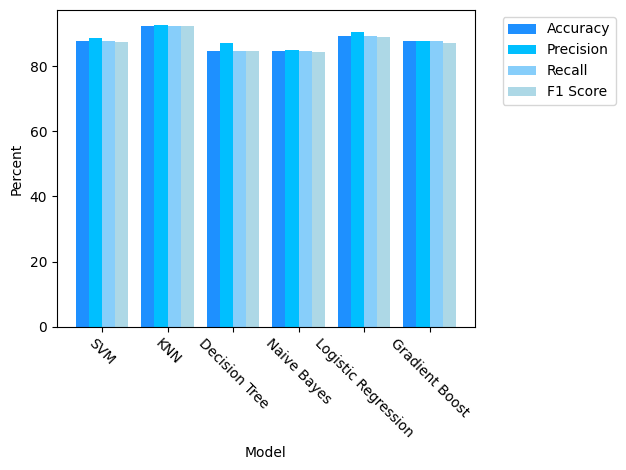

In [4]:
results.plot_single_models(sub_accuracies, sub_precisions, sub_recalls, sub_f1_scores)

### Volume

----------------------------
Accuracy: 0.8923
Precision: 0.8947
Recall: 0.8923
F1 score: 0.8911


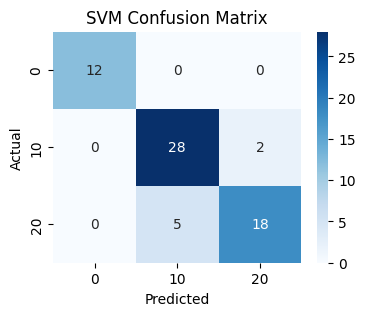

----------------------------
Accuracy: 0.9538
Precision: 0.9580
Recall: 0.9538
F1 score: 0.9533


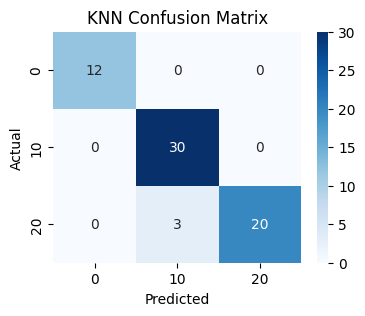

----------------------------
Accuracy: 0.8154
Precision: 0.8159
Recall: 0.8154
F1 score: 0.8135


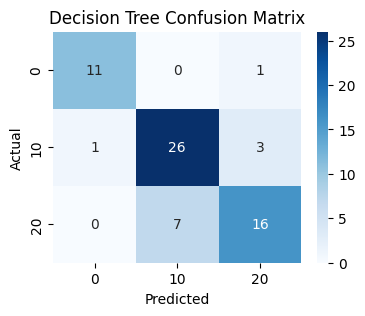

----------------------------
Accuracy: 0.7077
Precision: 0.7027
Recall: 0.7077
F1 score: 0.6985


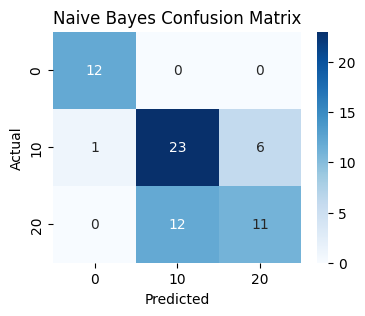

----------------------------
Accuracy: 0.8615
Precision: 0.8612
Recall: 0.8615
F1 score: 0.8611


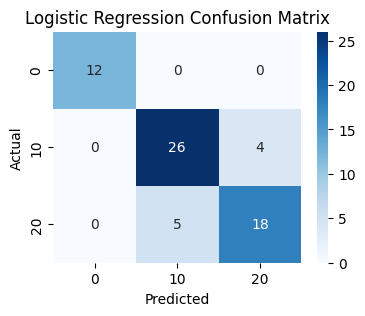

----------------------------
Accuracy: 0.9077
Precision: 0.9135
Recall: 0.9077
F1 score: 0.9062


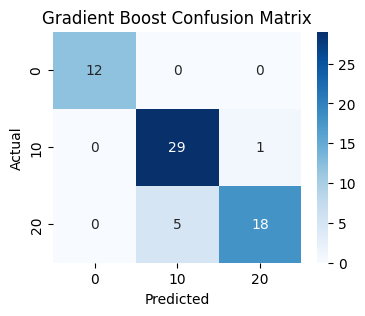

In [5]:
y = df['volume']

vol_accuracies, vol_precisions, vol_recalls, vol_f1_scores = models.train_single_models(x, y, 42)

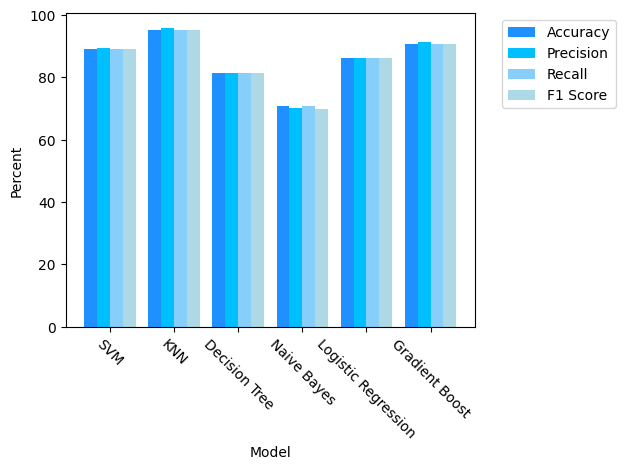

In [6]:
results.plot_single_models(vol_accuracies, vol_precisions, vol_recalls, vol_f1_scores)

# Multi Label Classification

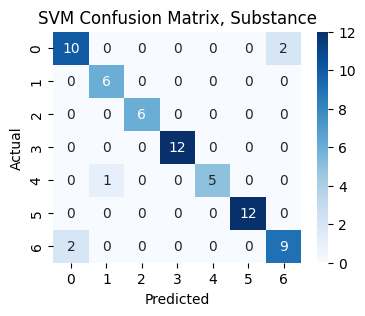

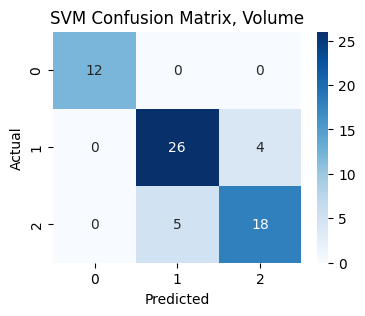

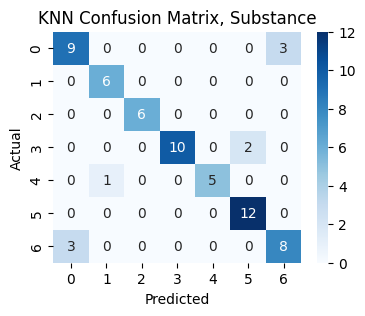

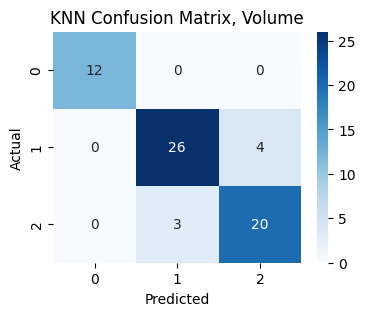

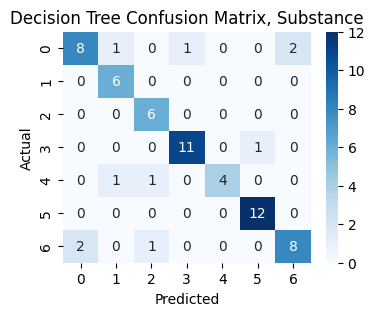

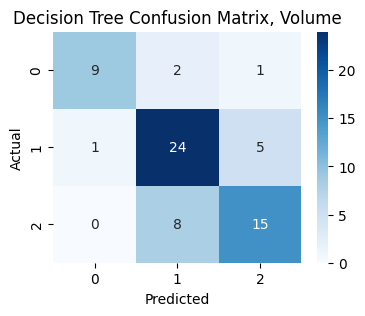

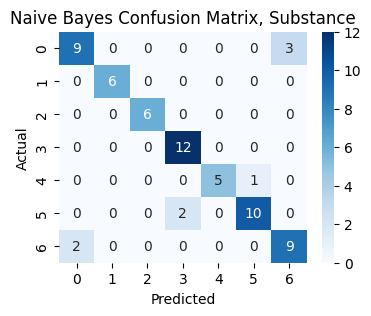

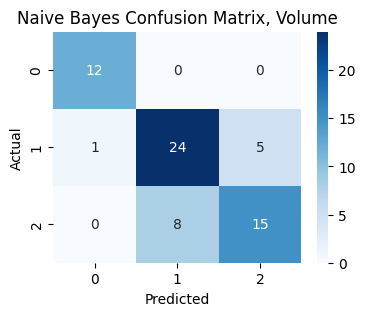

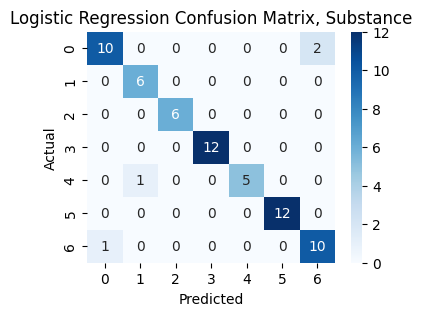

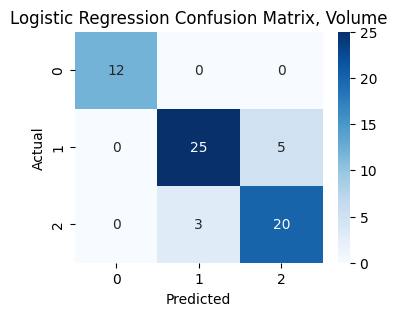

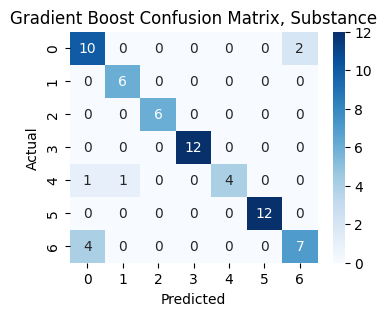

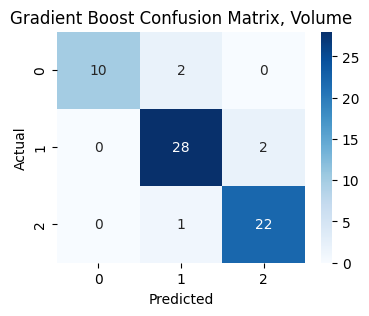

SVM
Exact Match Accuracy: 80.0000
Per-Label Accuracies: [92.30769231 86.15384615]
----------------------------
KNN
Exact Match Accuracy: 83.0769
Per-Label Accuracies: [86.15384615 89.23076923]
----------------------------
Decision Tree
Exact Match Accuracy: 67.6923
Per-Label Accuracies: [84.61538462 73.84615385]
----------------------------
Naive Bayes
Exact Match Accuracy: 69.2308
Per-Label Accuracies: [87.69230769 78.46153846]
----------------------------
Logistic Regression
Exact Match Accuracy: 83.0769
Per-Label Accuracies: [93.84615385 87.69230769]
----------------------------
Gradient Boost
Exact Match Accuracy: 84.6154
Per-Label Accuracies: [87.69230769 92.30769231]
----------------------------


In [7]:
y = df[['substance', 'volume']]
exact_accuracies, label_accuracies = models.train_multioutput_models(x, y, 42, True, True)

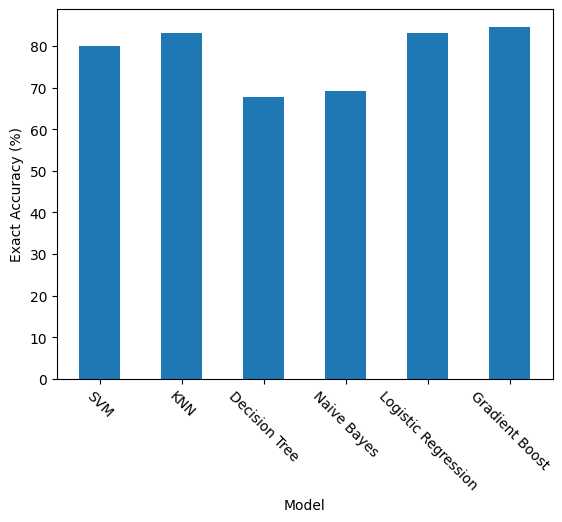

In [8]:
results.plot_accuracy(exact_accuracies)

In [9]:
import csv

output_path = r'C:\Users\chloe\OneDrive\Desktop\swallow EMG\outputs\classification\rectified_accuracies.csv'

with open(output_path, 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(exact_accuracies)

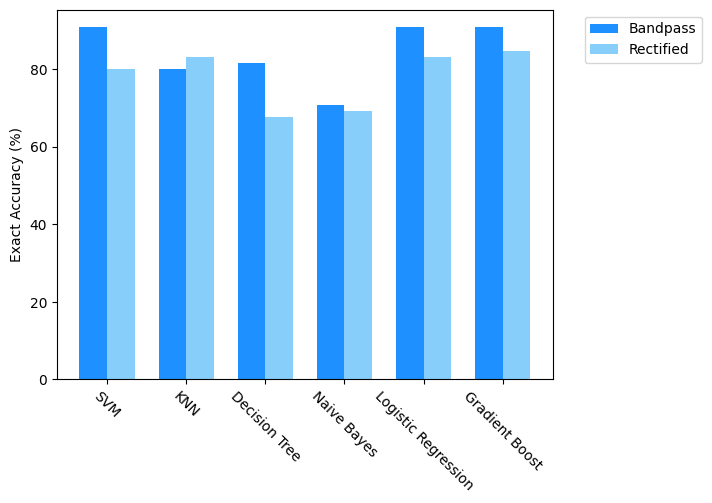

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from src.models import single_models

bandpass_accuracies_df = pd.read_csv('outputs/classification/bandpass_accuracies.csv', header=None)
bandpass_accuracies = bandpass_accuracies_df.iloc[0].tolist()

x = np.arange(len(single_models))  # [0, 1, 2]
width = 0.35  # width of each bar

# Plot bars side by side
plt.bar(x - width/2, bandpass_accuracies, width, label='Bandpass', color='dodgerblue')
plt.bar(x + width/2, exact_accuracies, width, label='Rectified', color='lightskyblue')

# Add labels
model_names = [name for name, _ in single_models]

plt.xticks(x, model_names, rotation=-45)
plt.ylabel('Exact Accuracy (%)')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()